In [1]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.amplitude.romannet import RomanAmplitude
from few.amplitude.interp2dcubicspline import Interp2DAmplitude
from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux, GenerateEMRIWaveform
from few.utils.utility import (get_overlap, 
                               get_mismatch, 
                               get_fundamental_frequencies, 
                               get_separatrix, 
                               get_mu_at_t, 
                               get_p_at_t, 
                               get_kerr_geo_constants_of_motion,
                               xI_to_Y,
                               Y_to_xI)

from few.utils.ylm import GetYlms
from few.utils.modeselector import ModeSelector
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.waveform import SchwarzschildEccentricWaveformBase
from few.summation.interpolatedmodesum import InterpolatedModeSum
from few.summation.directmodesum import DirectModeSum
from few.utils.constants import *
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# from lisatools.diagnostic import *
# from lisatools.sensitivity import get_sensitivity

from few.waveform import GenerateEMRIWaveform
from few.utils.constants import *
from few.utils.utility import *
from few.trajectory.inspiral import EMRIInspiral
traj_module = EMRIInspiral(func="SchwarzEccFlux")

from scipy.signal.windows import tukey, hann, boxcar, nuttall, blackman
from few.utils.fdutils import *

import warnings
warnings.filterwarnings("ignore")


In [3]:

# frequency domain
few_gen = GenerateEMRIWaveform(
    "FastSchwarzschildEccentricFlux", use_gpu=True,
    sum_kwargs=dict(pad_output=True, output_type="fd", odd_len=True),
    return_list=True
)

# time domain
td_gen = GenerateEMRIWaveform(
    "FastSchwarzschildEccentricFlux", use_gpu=True, 
    sum_kwargs=dict(pad_output=True, odd_len=True),
    return_list=True
)

In [7]:
# define the injection parameters
M = 4.15e6 # central object mass
a = 0.98  # will be ignored in Schwarzschild waveform
mu = 10.0 # secondary object mass
p0 = 0.15 # initial semi-latus rectum
e0 = 0.5 # eccentricity

x0 = 1.0  # will be ignored in Schwarzschild waveform
qK = np.pi/2  # polar spin angle
phiK = 0  # azimuthal viewing angle
qS = np.pi/3  # polar sky angle
phiS = 0  # azimuthal viewing angle
dist = 1.0  # distance
# initial phases
Phi_phi0 = 0.0
Phi_theta0 = 0.0
Phi_r0 = 0.0

Tobs = 1.0 # observation time, if the inspiral is shorter, the it will be zero padded 
dt = 10.0 # time interval
eps = 1e-2 # mode content percentage
mode_selection = [(2,2,0)]

waveform_kwargs = {
    "T": Tobs,
    "dt": dt,
# you can uncomment the following lines if you want to show a specific mode or modes
#     "mode_selection" : mode_selection,
#     "include_minus_m": True
    "eps": eps,
    
}

# get the initial p0 
p0 = get_p_at_t(
    traj_module,
    Tobs*0.99,
    [M, mu, 0.0, e0, 1.0],
    index_of_p=3,
    index_of_a=2,
    index_of_e=4,
    index_of_x=5,
    traj_kwargs={},
    xtol=2e-12,
    rtol=8.881784197001252e-16,
    bounds=None,
)


emri_injection_params = [
    M,  
    mu,
    a, 
    p0, 
    e0, 
    x0,
    dist, 
    qS,
    phiS,
    qK, 
    phiK, 
    Phi_phi0, 
    Phi_theta0, 
    Phi_r0
]

In [8]:
data_channels_td = td_gen(*emri_injection_params, **waveform_kwargs)


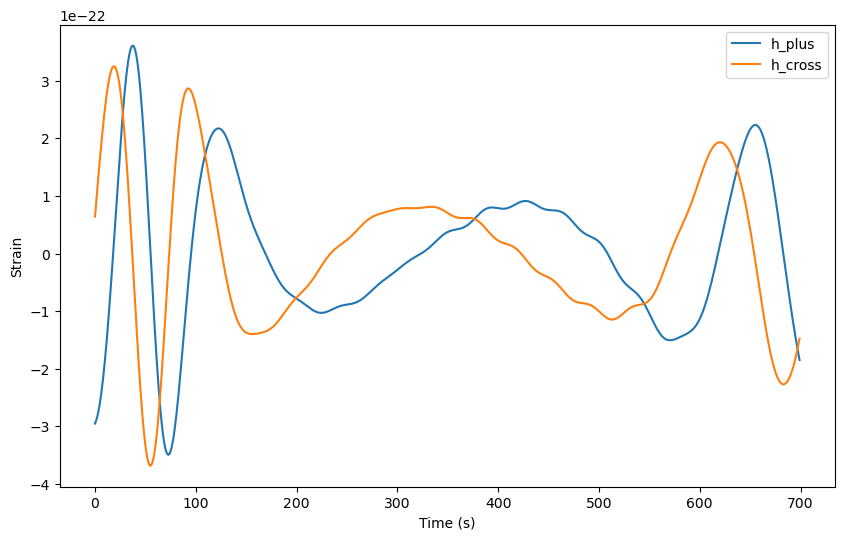

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(data_channels_td[0][:700].get(), label="h_plus")
plt.plot(data_channels_td[1][:700].get(), label="h_cross")
# plt.plot(data_channels_td[1].get(), label="h_cross")
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.legend()
plt.show()


In [10]:
 waveform = AAKWaveformBase.create_waveform(t,M,a,p,e,Y,dist,Phi_phi,Phi_theta,Phi_r,mu,qS,phiS,qK,phiK,self.nmodes,mich=mich,dt=dt,T=T,
        )

AttributeError: type object 'AAKWaveformBase' has no attribute 'create_waveform'